# Titanic Disaster Walkthrough

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np

# Figures inline and set visualization style
%matplotlib inline
sns.set()

# Import data
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

y = train.Survived

# Concatenate training and test sets
full = pd.concat([train.drop(['Survived'], axis=1), test])

## Examining the Dataset

In [2]:
full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [3]:
full.sample(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
93,94,3,"Dean, Mr. Bertram Frank",male,26.0,1,2,C.A. 2315,20.5750,NaN,S
471,472,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S
322,323,2,"Slayter, Miss. Hilda Mary",female,30.0,0,0,234818,12.3500,NaN,Q
110,1002,2,"Stanton, Mr. Samuel Ward",male,41.0,0,0,237734,15.0458,NaN,C
438,439,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
374,1266,1,"Dodge, Mrs. Washington (Ruth Vidaver)",female,54.0,1,1,33638,81.8583,A34,S
290,291,1,"Barber, Miss. Ellen ""Nellie""",female,26.0,0,0,19877,78.8500,NaN,S
819,820,3,"Skoog, Master. Karl Thorsten",male,10.0,3,2,347088,27.9000,NaN,S
854,855,2,"Carter, Mrs. Ernest Courtenay (Lilian Hughes)",female,44.0,1,0,244252,26.0000,NaN,S
197,198,3,"Olsen, Mr. Karl Siegwart Andreas",male,42.0,0,1,4579,8.4042,NaN,S


In [4]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [5]:
train.groupby('Pclass').Pclass.count()

Pclass
1    216
2    184
3    491
Name: Pclass, dtype: int64

`Pclass 1` passengers make up 26%(216/891) of the passengers on board, yet 63% of them susrvive, as apposed to `Pclass 3` which make up 60% (491/891) of the passengers yet only 23% survive.

In [6]:
train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [7]:
train.groupby('Sex').Sex.count()

Sex
female    314
male      577
Name: Sex, dtype: int64

Women make up 35% (314/891) of the passengers, yet 74% survive, as apposed to only 19% of men.

## Feature Engineering

Extract the 'Title' from 'Name' and save to a new 'Title' feature

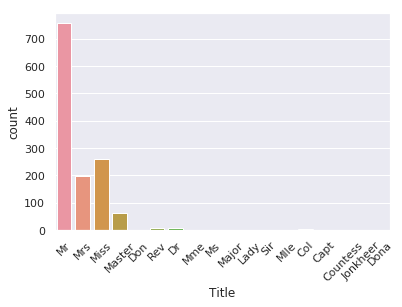

In [9]:
full['Title'] = full.Name.apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))

# plot the titles
sns.countplot(x='Title', data=full)
plt.xticks(rotation=45);

We'll group the rarer 'Title's in to 'one' bucket - 'Special'

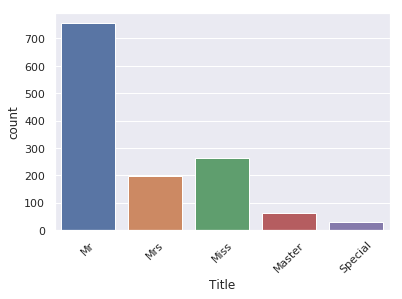

In [11]:
full['Title'] = full['Title'].replace({'Mlle':'Miss', 'Mme':'Mrs', 'Ms':'Miss'})
full['Title'] = full['Title'].replace(['Don', 'Dona', 'Rev', 'Dr',
                                            'Major', 'Lady', 'Sir', 'Col', 'Capt', 'Countess', 'Jonkheer'],'Special')
sns.countplot(x='Title', data=full);
plt.xticks(rotation=45);

A large number of passengers have no cabin value, `NaN`. It is reasonable to presume that those NaNs didn't have a cabin, which may tell us something about 'Survival' so now create a new column that encodes this information.

In [13]:
full['hasCabin'] = ~full.Cabin.isnull()

In [15]:
full.sample(10).T

,170,412,283,106,272,312,225,198,303,5
PassengerId,171,413,1175,998,273,313,226,1090,1195,897
Pclass,1,1,3,3,2,2,3,2,3,3
Name,"Van der hoef, Mr. Wyckoff","Minahan, Miss. Daisy E","Touma, Miss. Maria Youssef","Buckley, Mr. Daniel","Mellinger, Mrs. (Elizabeth Anne Maidment)","Lahtinen, Mrs. William (Anna Sylfven)","Berglund, Mr. Karl Ivar Sven","Baimbrigge, Mr. Charles Robert","Pokrnic, Mr. Tome","Svensson, Mr. Johan Cervin"
Sex,male,female,female,male,female,female,male,male,male,male
Age,61,33,9,21,41,26,22,23,24,14
SibSp,0,1,1,0,0,1,0,0,0,0
Parch,0,0,1,0,1,1,0,0,0,0
Ticket,111240,19928,2650,330920,250644,250651,PP 4348,C.A. 31030,315092,7538
Fare,33.5,90,15.2458,7.8208,19.5,26,9.35,10.5,8.6625,9.225
Cabin,B19,C78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We'll combine the `SibSp` and `Parch` columns to make a family column

In [18]:
# add the passenger to the group
full['Family'] = full['SibSp'] + full['Parch'] + 1

We'll check to see if there is any crrelation between family size and survival.

In [22]:
train['Family'] = train['SibSp'] + train['Parch'] + 1
train[['Family', 'Survived']].groupby(['Family'], as_index=False).mean()

,Family,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


A person on their own had only a 30% chance of survival, groups of 2,3 or 4 members had at least a 50% chance of survival. This could be related to age, large numbers of 20-30 year olds were traveling on their own and died.

Handling the missing fields, `Age`, `Fare` and `Embarcation`:

In [24]:
full['Embarked'] = full.Embarked.fillna('S') # most common
full['Fare']= full.Fare.fillna(full.Fare.median())
full['Age'] = full.Age.fillna(full.Age.median())

In [25]:
full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 14 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1309 non-null float64
Cabin          295 non-null object
Embarked       1309 non-null object
Title          1309 non-null object
hasCabin       1309 non-null bool
Family         1309 non-null int64
dtypes: bool(1), float64(2), int64(5), object(6)
memory usage: 184.5+ KB


In [26]:
full.sample(10).T

,18,275,56,86,239,774,70,368,374,292
PassengerId,910,276,57,87,240,775,71,369,1266,1184
Pclass,3,1,2,3,2,2,2,3,1,3
Name,"Ilmakangas, Miss. Ida Livija","Andrews, Miss. Kornelia Theodosia","Rugg, Miss. Emily","Ford, Mr. William Neal","Hunt, Mr. George Henry","Hocking, Mrs. Elizabeth (Eliza Needs)","Jenkin, Mr. Stephen Curnow","Jermyn, Miss. Annie","Dodge, Mrs. Washington (Ruth Vidaver)","Nasr, Mr. Mustafa"
Sex,female,female,female,male,male,female,male,female,female,male
Age,27,63,21,16,33,54,32,28,54,28
SibSp,1,1,0,1,0,1,0,0,1,0
Parch,0,0,0,3,0,3,0,0,1,0
Ticket,STON/O2. 3101270,13502,C.A. 31026,W./C. 6608,SCO/W 1585,29105,C.A. 33111,14313,33638,2652
Fare,7.925,77.9583,10.5,34.375,12.275,23,10.5,7.75,81.8583,7.2292
Cabin,NaN,D7,NaN,NaN,NaN,NaN,NaN,NaN,A34,NaN


Convert `Age` and `Fare` variables into ranges. Will be represented as categories from 0-3

In [29]:
full['catAge'] = pd.qcut(full.Age, q=4, labels=False)
full['catFare'] = pd.qcut(full.Fare, q=4, labels=False)

In [30]:
full.sample(10).T

,387,533,409,638,89,233,261,214,95,427
PassengerId,1279,534,410,639,90,1125,1153,1106,987,428
Pclass,2,3,3,3,3,3,3,3,3,2
Name,"Ashby, Mr. John","Peter, Mrs. Catherine (Catherine Rizk)","Lefebre, Miss. Ida","Panula, Mrs. Juha (Maria Emilia Ojala)","Celotti, Mr. Francesco","Linehan, Mr. Michael","Nilsson, Mr. August Ferdinand","Andersson, Miss. Ida Augusta Margareta","Tenglin, Mr. Gunnar Isidor","Phillips, Miss. Kate Florence (""Mrs Kate Louis..."
Sex,male,female,female,female,male,male,male,female,male,female
Age,57,28,28,41,24,28,21,38,25,19
SibSp,0,0,3,0,0,0,0,4,0,0
Parch,0,2,1,5,0,0,0,2,0,0
Ticket,244346,2668,4133,3101295,343275,330971,350410,347091,350033,250655
Fare,13,22.3583,25.4667,39.6875,8.05,7.8792,7.8542,7.775,7.7958,26
Cabin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Extract the columns that we'll use to train our model

In [31]:
full.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title', 'hasCabin', 'Family',
       'catAge', 'catFare'],
      dtype='object')

In [37]:
full_subset = full[['Pclass', 'Sex', 'SibSp', 'Parch',
        'Embarked', 'Title', 'hasCabin', 'Family',
       'catAge', 'catFare']]

full_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 10 columns):
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Parch       1309 non-null int64
Embarked    1309 non-null object
Title       1309 non-null object
hasCabin    1309 non-null bool
Family      1309 non-null int64
catAge      1309 non-null int64
catFare     1309 non-null int64
dtypes: bool(1), int64(6), object(3)
memory usage: 143.5+ KB


In [38]:
full_subset.sample(10)

,Pclass,Sex,SibSp,Parch,Embarked,Title,hasCabin,Family,catAge,catFare
491,3,male,0,0,S,Mr,False,1,0,0
414,1,female,0,0,C,Special,True,1,3,3
97,1,male,0,1,C,Mr,True,2,1,3
322,2,male,0,0,S,Mr,True,1,1,1
96,1,female,1,0,S,Mrs,True,2,3,3
510,3,male,0,0,Q,Mr,False,1,2,0
217,1,male,1,1,S,Mr,False,3,3,3
393,2,male,0,0,S,Mr,False,1,3,1
300,3,male,0,0,S,Mr,False,1,2,0
348,2,male,0,0,S,Mr,False,1,1,1


Convert `Embarked` and `Title` into numerical values

In [39]:
full_subset = pd.get_dummies(full_subset)
full_subset.sample(5).T

,101,307,468,219,87
Pclass,2,3,3,3,3
SibSp,1,0,0,0,0
Parch,0,1,0,0,0
hasCabin,False,False,False,False,False
Family,2,2,1,1,1
catAge,1,0,1,1,1
catFare,2,1,0,1,1
Sex_female,0,0,0,0,0
Sex_male,1,1,1,1,1
Embarked_C,0,0,0,0,0
